In [1]:
from CanDataLoader import CanDataLoader
from dotenv import load_dotenv
import os

load_dotenv()
data_path = os.getenv('DATA_PATH')
dataset = CanDataLoader(data_path, log_verbosity=1)


Found ambient and attack directories.
Loading CAN metadata...
  Looking for /Users/jamescourson/Documents/CANIDS/data/ambient/parquet/ambient_dyno_drive_basic_long.parquet
  Looking for /Users/jamescourson/Documents/CANIDS/data/ambient/parquet/ambient_dyno_drive_basic_short.parquet
  Looking for /Users/jamescourson/Documents/CANIDS/data/ambient/parquet/ambient_dyno_drive_benign_anomaly.parquet
  Looking for /Users/jamescourson/Documents/CANIDS/data/ambient/parquet/ambient_dyno_drive_extended_long.parquet
  Looking for /Users/jamescourson/Documents/CANIDS/data/ambient/parquet/ambient_dyno_drive_extended_short.parquet
  Looking for /Users/jamescourson/Documents/CANIDS/data/ambient/parquet/ambient_dyno_drive_radio_infotainment.parquet
  Looking for /Users/jamescourson/Documents/CANIDS/data/ambient/parquet/ambient_dyno_drive_winter.parquet
  Looking for /Users/jamescourson/Documents/CANIDS/data/ambient/parquet/ambient_dyno_exercise_all_bits.parquet
  Looking for /Users/jamescourson/Documen

In [7]:
for df in dataset.attack_data:
    print(df)

             time   aid              data    time_diffs  \
0        0.000000   852  1FFF40000003C580  0.000000e+00   
1        0.000001  1505  893FE0070A000080  1.192093e-06   
2        0.000002   651  0000000000000000  9.536743e-07   
3        0.000992   167  005108E5112A00A0  9.899139e-04   
4        0.000994   722  0000500000000000  2.145767e-06   
...           ...   ...               ...           ...   
192012  86.459022   560  F700000A7C000E00  9.698868e-04   
192013  86.461950   339  00000000000C1002  2.928019e-03   
192014  86.462905  1634  4E60000040000000  9.551048e-04   
192015  86.462906   412  02FC200002002730  9.536743e-07   
192016  86.462907    14  2054560208087530  9.536743e-07   

        time_diff_since_last_msg  
0                            NaN  
1                            NaN  
2                            NaN  
3                            NaN  
4                            NaN  
...                          ...  
192012                  0.019958  
192013     

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

for i, df in enumerate(dataset.attack_data):
    if "actual_attack" in df.columns:
        
        # highlight the attacks
        not_attacks = df[df["actual_attack"] == 0]
        plt.scatter(not_attacks["time"], not_attacks["delta_time_last_same_aid"], c="blue", s=10, edgecolors='black', label="Not Attack", linewidth=0.5)
        
        # highlight the attacks
        attacks = df[df["actual_attack"] == 1]
        plt.scatter(attacks["time"], attacks["delta_time_last_same_aid"], c="red", s=10, edgecolors='black', label="Attack", linewidth=0.5)
        

        plt.xlabel("Time")
        plt.ylabel("Time Differences")
        plt.title(f"Time vs Time Differences with Attacks Highlighted for {dataset.attack_files[i]}")
        plt.legend()
        plt.tight_layout()
        plt.show()

/var/folders/z3/d17r3zxx2g3gjt2dl654wrpr0000gn/T/ipykernel_68805/1460343825.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


KeyError: 'delta_time_last_same_aid'

/var/folders/z3/d17r3zxx2g3gjt2dl654wrpr0000gn/T/ipykernel_68805/328190546.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


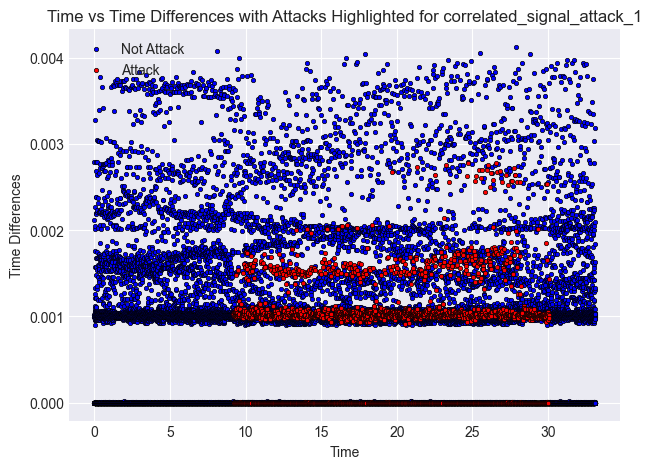

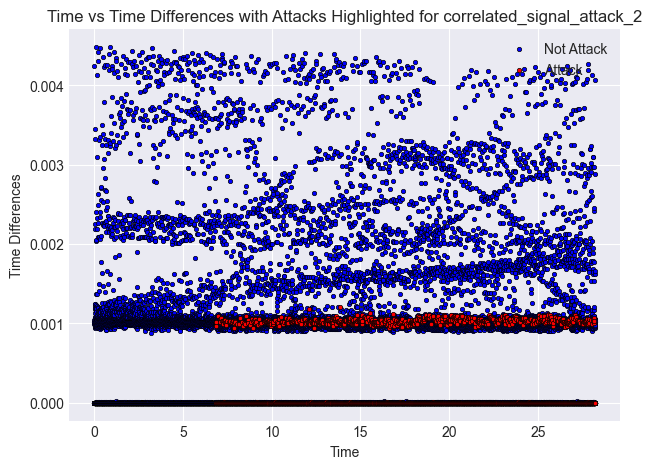

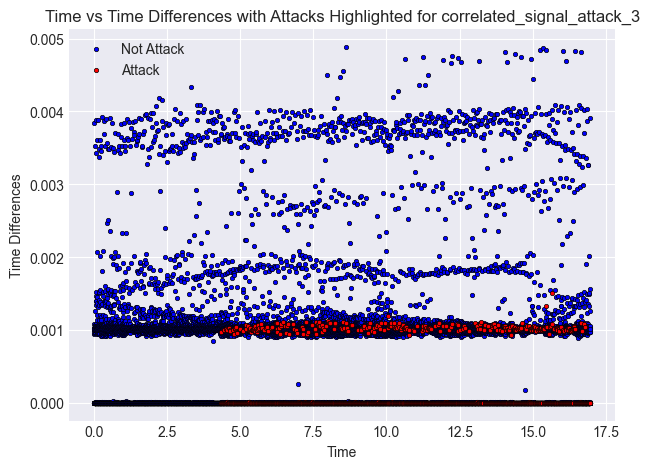

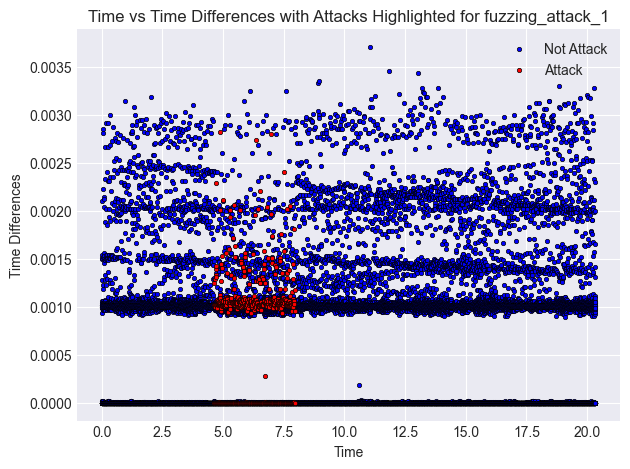

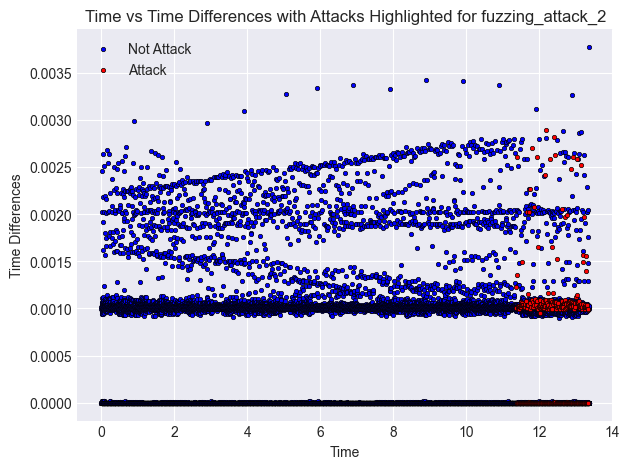

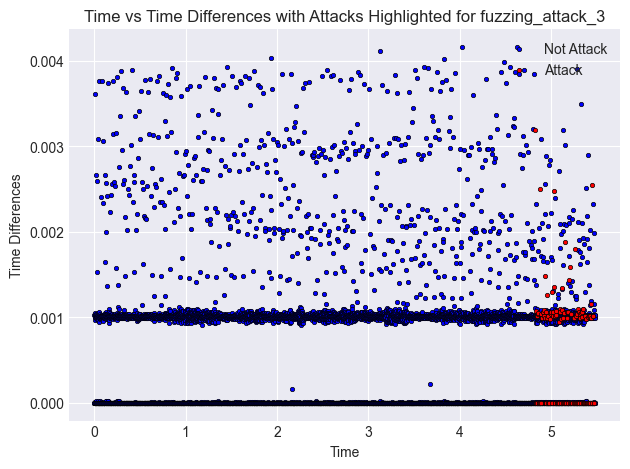

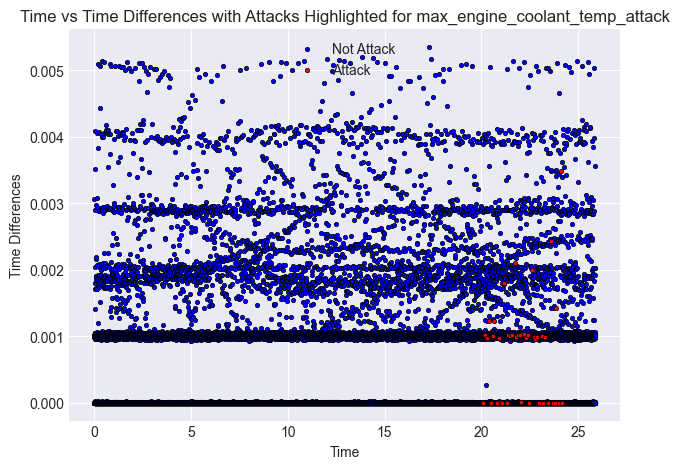

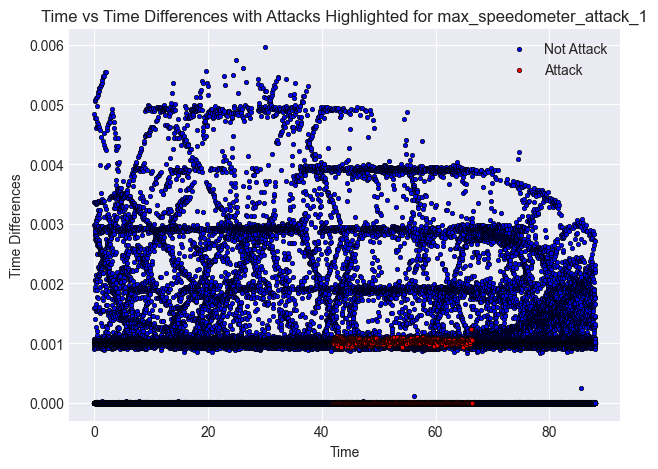

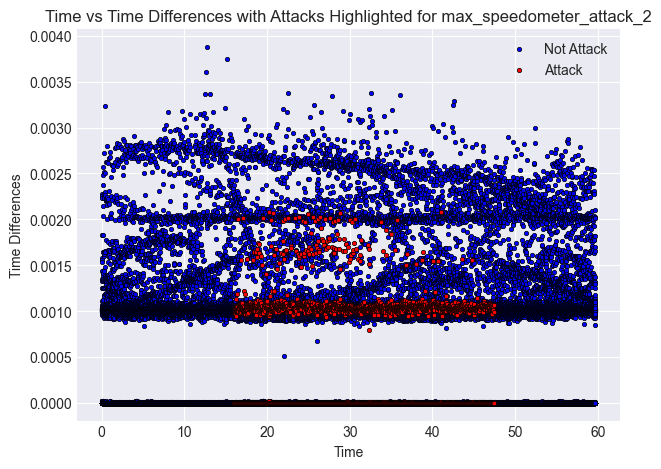

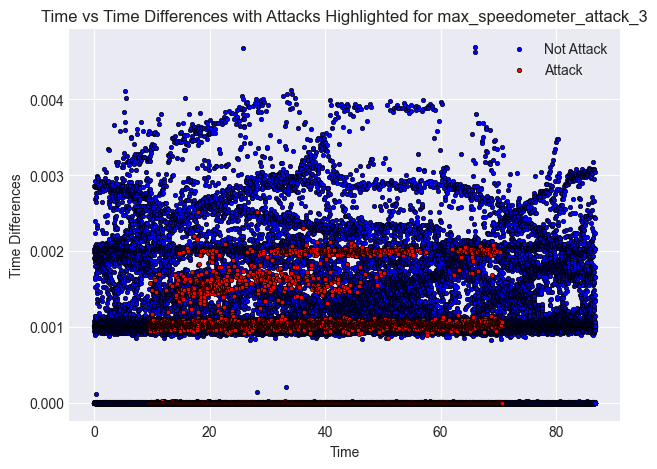

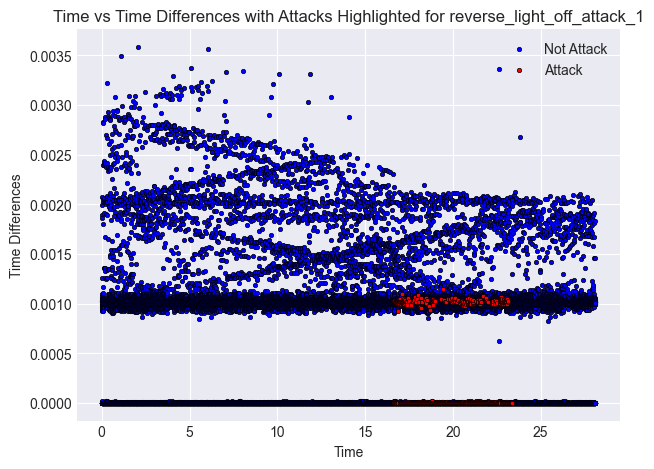

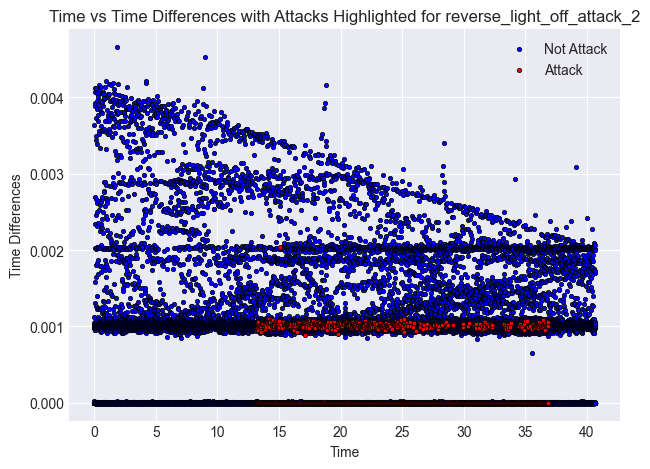

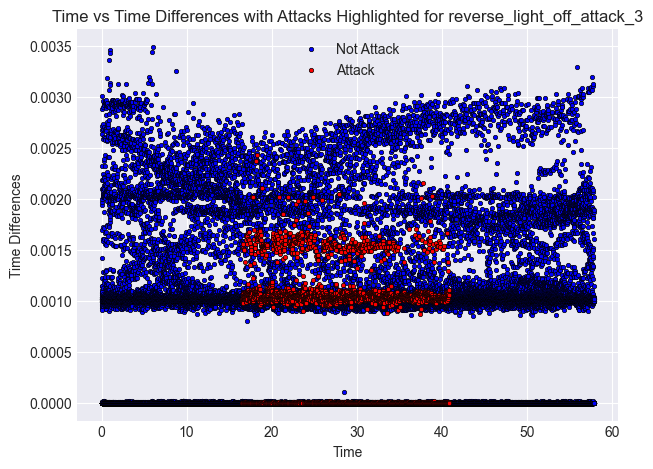

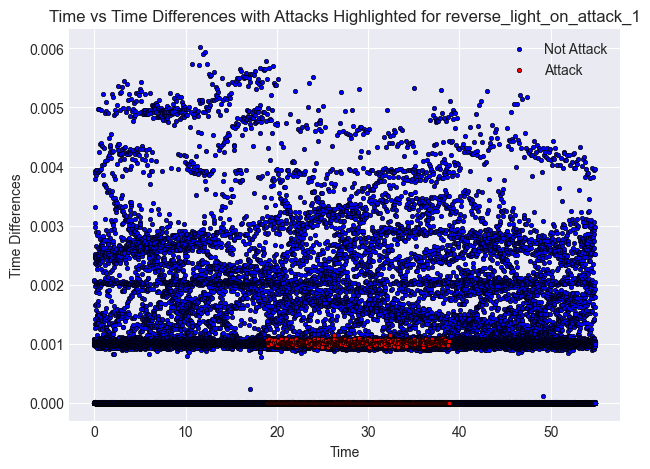

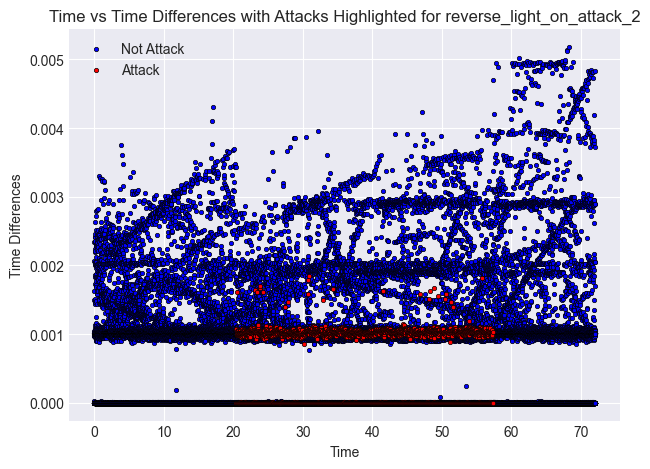

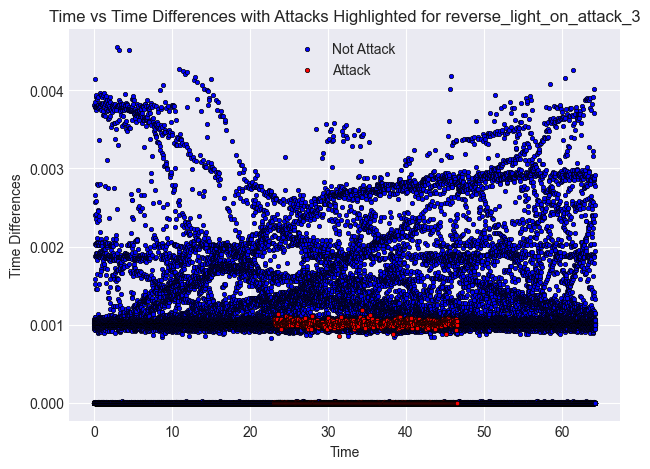

In [3]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

for i, df in enumerate(dataset.attack_data):
    if "actual_attack" in df.columns:
        
        # highlight the attacks
        not_attacks = df[df["actual_attack"] == 0]
        plt.scatter(not_attacks["time"], not_attacks["time_diffs"], c="blue", s=10, edgecolors='black', label="Not Attack", linewidth=0.5)
        
        # highlight the attacks
        attacks = df[df["actual_attack"] == 1]
        plt.scatter(attacks["time"], attacks["time_diffs"], c="red", s=10, edgecolors='black', label="Attack", linewidth=0.5)
        

        plt.xlabel("Time")
        plt.ylabel("Time Differences")
        plt.title(f"Time vs Time Differences with Attacks Highlighted for {dataset.attack_files[i]}")
        plt.legend()
        plt.tight_layout()
        plt.show()

In [40]:

for df in dataset.attack_data:
    print(df)


            time   aid              data  time_diffs  time_diff_since_last_msg
0       0.000000  1505  893FC00B0A013880  -33.012976                       NaN
1       0.000001   651  0000000000000000  -32.960883              1.072884e-06
2       0.000003   167  0010FA24D12E00A0  -32.677989              2.026558e-06
3       0.000004   208  4A7704600201F000  -32.218136              9.536743e-07
4       0.000997    51  000698000E4207D0  -32.779794              9.930134e-04
...          ...   ...               ...         ...                       ...
74145  33.095972   651  0000000000000000    0.019446              1.072884e-06
74146  33.096941    51  177FA9788DC007D0    0.009540              9.689331e-04
74147  33.096943   167  00510BA5212BA0A0    0.008542              2.026558e-06
74148  33.096944    61  0000020000000000    0.099977              1.072884e-06
74149  33.098782  1413  0040000000020018    0.099863              1.837969e-03

[74150 rows x 5 columns]
               time   aid 